# Detecção de Outliers

In [23]:
library(repr)
options(repr.plot.width= 3, repr.plot.height= 3)
# Outliers
library(outliers)
library(EnvStats)
# DBScan
library(dbscan)
# Gráficos
library(cluster)

## Carregar a Base de dados - Titanic

In [3]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


# Sumário Estatístico

- Estatísticas básicas das colunas de Idade e Valor do Tíquete (Fare)
- Podemos notar possíveis outliers em Idade e Fare
    - 75% dos passageiros possuem idade menor que 38 anos com uma mperia de 29.7 anos. 
    - 75% dos passageiros pagaram o ticket no valor de 31, mas teve pessoas que pagaram 512 e outras que não pagaram. 

In [4]:
summary(df[, c(6,10)])

      Age             Fare       
 Min.   : 0.42   Min.   :  0.00  
 1st Qu.:20.12   1st Qu.:  7.91  
 Median :28.00   Median : 14.45  
 Mean   :29.70   Mean   : 32.20  
 3rd Qu.:38.00   3rd Qu.: 31.00  
 Max.   :80.00   Max.   :512.33  
 NA's   :177                     

# Historgrama

- Pelo Histograma podemos notar que muitos passageiros (mais de 500) não pagaram passagens
- Podemos notar que poucos pagaram passagem entre 300 e 500, mas alguns pagaram passagens por mais de 500. 
- Enquanto a idade parece serguir a distribuição normal e a idade de 80 (valor máximo) para ser um valor aceitável.

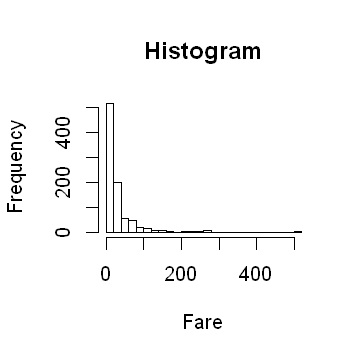

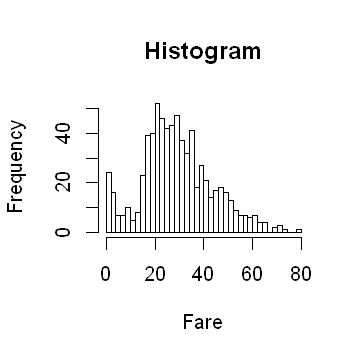

In [5]:
hist(
    df$Fare,
    xlab = "Fare",
    main = "Histogram",
    breaks = sqrt(nrow(df))    
)

hist(
    df$Age,
    xlab = "Fare",
    main = "Histogram",
    breaks = sqrt(nrow(df))    
)

# Box-Plot

- Fare - O boxplot nos mostra que há muitos pontos fora da curvas no preço das passagens
- Idade - Há poucos pontos fora da curva

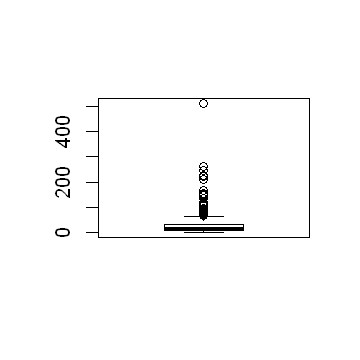

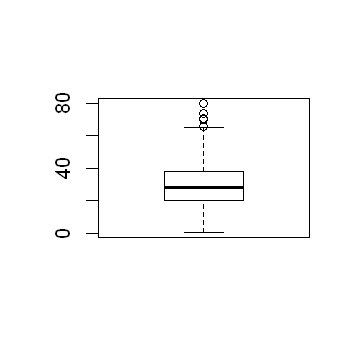

In [6]:
boxplot(df$Fare)
boxplot(df$Age)

# Gráfico de Dispersão

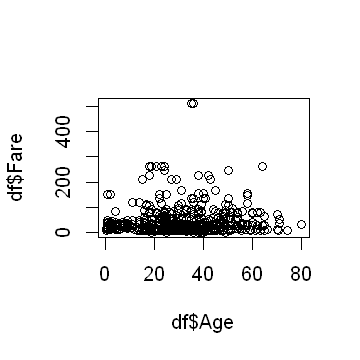

In [7]:
plot(df$Age, df$Fare)

# Percentis

- Fare 
    - Notamos que menos de 2% das pessoas pagaram 6.75
    - Notamos que quase 98% dos passageiros paragram passagens igual ou menor que 153
- Age
    - Notamos que 2% dos passageiros possuem idade igual ou menor que 2
    - Notamos que quase 98% dos passageiros possuem idade igual ou menor a 62

In [8]:
baixo <- quantile(df$Fare, 0.025)
baixo
meio <- quantile(df$Fare, 0.5)
meio
alto <- quantile(df$Fare, 0.975)
alto

2.5% 
6.75

50% 
14.4542

97.5% 
153.4625

In [9]:
baixo2 <- quantile(df$Age, 0.025, na.rm = T)
baixo2
meio2 <- quantile(df$Age, 0.5, na.rm = T)
meio2
alto2 <- quantile(df$Age, 0.975, na.rm = T)
alto2

2.5% 
   2

50% 
 28

97.5% 
   62

## Indíces

- Com a função **which** podemos pegar os índices dos valores que podemos considerar como possíveis outliers

In [10]:
indice_outliers <- which(df$Fare < baixo | df$Fare > alto)
print(indice_outliers)

 [1]  28  89 119 180 203 259 264 272 278 300 303 312 319 327 342 372 378 379 381
[20] 414 439 467 482 528 558 598 634 675 680 690 701 717 731 733 738 743 780 807
[39] 816 819 823 844 857 873


# Filtro de Hampel

In [11]:
baixo <- median(df$Fare) - 3 * mad(df$Fare, constant = 1)
baixo
alto <- median(df$Fare) + 3 * mad(df$Fare, constant = 1)
alto

[1] -6.2584

[1] 35.1668

## Indíces
- Com a função **which** podemos pegar os índices dos valores que podemos considerar como possíveis outliers

In [12]:
indice_outliers <- which(df$Fare < baixo | df$Fare > alto)
print(indice_outliers)

  [1]   2   4   7  24  28  32  35  36  44  51  53  55  56  60  62  63  72  73
 [19]  75  84  89  93  98 103 111 119 121 125 138 140 146 152 156 160 165 167
 [37] 170 181 184 186 196 202 216 219 225 231 246 249 257 258 259 263 267 269
 [55] 270 276 291 292 298 300 306 307 308 310 311 312 319 320 325 326 330 333
 [73] 335 337 338 340 342 357 367 370 371 374 376 378 381 384 386 387 391 394
 [91] 413 435 436 439 446 454 458 463 476 481 485 487 494 497 499 505 506 510
[109] 514 521 524 528 538 540 541 545 550 551 557 558 559 572 578 582 584 586
[127] 588 592 600 603 609 610 616 619 622 628 639 642 644 646 648 656 660 661
[145] 666 670 671 672 679 680 682 684 685 686 687 690 691 693 699 701 709 711
[163] 713 717 725 731 738 742 743 746 749 755 760 764 766 767 780 782 790 793
[181] 803 810 818 821 825 827 828 830 836 839 847 850 854 857 864 868 872 880


## Teste de Grubbs

- O teste de Grubbs pode ser feito com o método **grubbs.test** que irá identificar se o maior valor dos dados é um outlier
- Caso queria o menor valor, devemos especificar o parâmetro **opposite = TRUE**

In [13]:
test <- grubbs.test(df$Fare)
test


	Grubbs test for one outlier

data:  df$Fare
G = 9.6617, U = 0.8950, p-value < 2.2e-16
alternative hypothesis: highest value 512.3292 is an outlier


In [14]:
test <- grubbs.test(df$Fare, opposite = TRUE)
test


	Grubbs test for one outlier

data:  df$Fare
G = 0.64806, U = 0.99953, p-value = 1
alternative hypothesis: lowest value 0 is an outlier


## Teste de Dixon

- O teste de Dixon pode ser feito com o método dixon.test que irá identificar se o maior valor dos dados é um outlier
- Caso queria o menor valor, devemos especificar o parâmetro opposite = TRUE
- **O método funiona apenas para conjuntos pequenos de dados (entre 3 e 30 dados)**.

In [15]:
subdf = df[1:20, ]
test <- dixon.test(subdf$Fare)
test


	Dixon test for outliers

data:  subdf$Fare
Q = 0.30618, p-value = 0.5449
alternative hypothesis: highest value 71.2833 is an outlier


In [16]:
subdf = df[1:20, ]
test <- dixon.test(subdf$Fare, opposite = TRUE)
test


	Dixon test for outliers

data:  subdf$Fare
Q = 0.014096, p-value < 2.2e-16
alternative hypothesis: lowest value 7.225 is an outlier


## Teste de Rosner

- O teste de Rosner pode ser feito com o método rosnerTest que irá identificar se um conjunto de k maiores valores dos dados são outliers

In [17]:
test <- rosnerTest(df$Fare, k = 10)
test


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            df$Fare

Sample Size:                     891

Test Statistics:                 R.1  =  9.661740
                                 R.2  = 10.218532
                                 R.3  = 10.884205
                                 R.4  =  5.644447
                                 R.5  =  5.751990
                                 R.6  =  5.865923
                                 R.7  =  5.986907
                                 R.8  =  6.099327
                                 R.9  =  6.235700
                                 R.10 =  5.975457

Test Statistic Parameter:        k = 10

Alternative Hypothesis:          Up to 10 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     10

   i   Mean.i     SD.i   

In [18]:
test$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
0,32.20421,49.69343,512.3292,259,9.661740,4.011374,TRUE
1,31.66474,47.03850,512.3292,680,10.218532,4.011094,TRUE
2,31.12406,44.21133,512.3292,738,10.884205,4.010814,TRUE
3,30.58216,41.17637,263.0000,28,5.644447,4.010533,TRUE
4,30.32014,40.45207,263.0000,89,5.751990,4.010252,TRUE
5,30.05752,39.71114,263.0000,342,5.865923,4.009971,TRUE
6,29.79431,38.95262,263.0000,439,5.986907,4.009690,TRUE
7,29.53050,38.17544,262.3750,312,6.099327,4.009408,TRUE
8,29.26680,37.38284,262.3750,743,6.235700,4.009125,TRUE
9,29.00251,36.56930,247.5208,119,5.975457,4.008843,TRUE


# DBScan

- Os grupos com valore zerado indica outliers, que não pertence a nenhum grupo. 

In [32]:
df2 = df[is.na(df$Age) == F, c(6,10)]
df2 = scale(df2)
agrupador = dbscan(df2, eps = 0.5, minPts = 10)
grupos = agrupador$cluster

In [71]:
unique(grupos)

[1] 1 0

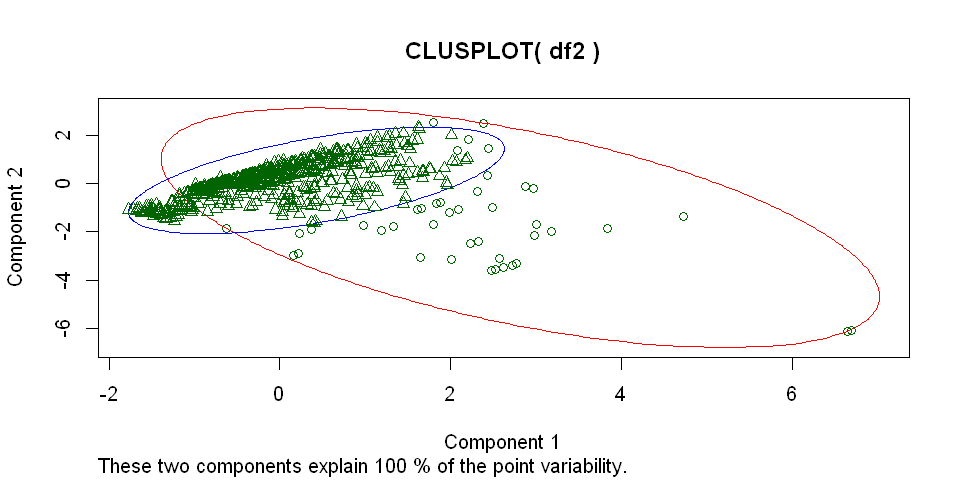

In [72]:
clusplot( 
    df2,
    grupos,
    color = TRUE,
)

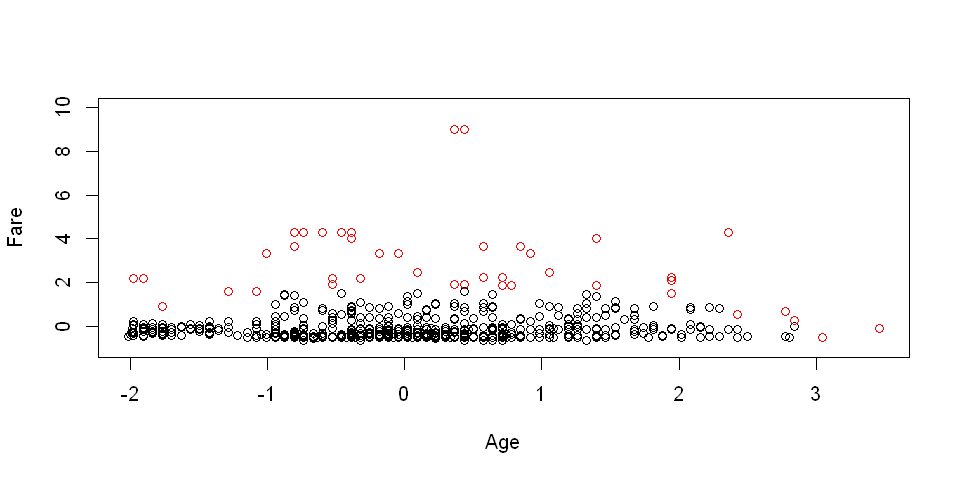

In [83]:
options(repr.plot.width=8, repr.plot.height= 4)

plot(
    Fare ~ Age,
    data = df2,
    ylim = c(-1, 10),
    col = c("red", "black")[as.factor(grupos)]
)